In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Data Mining Data /Cleaned_DAWN_Data_2004-2011.csv")
y_2004 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2004.csv")
y_2005 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2005.csv")
y_2006 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2006.csv")
y_2007 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2007.csv")
y_2008 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2008.csv")
y_2009 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2009.csv")
y_2010 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2010.csv")
y_2011 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2011.csv")

dataframes = {
    'y_2004': y_2004,
    'y_2005': y_2005,
    'y_2006': y_2006,
    'y_2007': y_2007,
    'y_2008': y_2008,
    'y_2009': y_2009,
    'y_2010': y_2010,
    'y_2011': y_2011,
}

metro_mapping = {1:'MA',2:'NY',3:'IL',4:'MI',5:'MN',6:'FL',7:'TX',8:'LA',9:'CO',10:'AZ',11:'CA-SD',12:'CA-SF',13:'WA',14:'Other'}
agecat_mapping = {1:'<=5',2:'6-11',3:'12-17',4:'18-20',5:'21-24',6:'25-29',7:'30-34',8:'35-44',9:'45-54',10:'55-64',11:'>=65',-8:'PNS'}
sex_mapping = {1:'M',2:'F',-8:'PNS'}
race_mapping = {1:'white only',2:'black or african american only',3:'any hispanic or latino',4:'all other races',-8:'PNS'}
casetype_mapping = {1:'suicide attempt',2:'seeking detox',3:'alcohol only(age < 21)',4:'adverse reaction',5:'overmedication',6:'malicious poisoning',7:'accidental ingestion',8:'other'}
disposition_mapping = {1:'discharged home',2:'released to police/jail',3:'reffered to detox/treatment',4:'ICU/critical care',5:'surgery',6:'chemical dependency/detox, psychiatric unit',7:'other inpatient unit',8:'transferred',9:'left against medical advice',10:'died',96:'other',-8:'PNS'}

for df in dataframes.values():
    df['METRO'] = df['METRO'].replace(metro_mapping)
    df['AGECAT'] = df['AGECAT'].replace(agecat_mapping)
    df['SEX'] = df['SEX'].replace(sex_mapping)
    df['RACE'] = df['RACE'].replace(race_mapping)
    df['CASETYPE'] = df['CASETYPE'].replace(casetype_mapping)
    df['DISPOSITION'] = df['DISPOSITION'].replace(disposition_mapping)


def map_age_category(agecat):
    if agecat in ['<=5', '6-11', '12-17', '18-20', '21-24', '25-29']:
        return 'Young'
    elif agecat in ['30-34', '35-44','45-54']:
        return 'Middle Age'
    elif agecat in ['55-64', '>=65']:
        return 'Old'
    else:  
        return 'Other'

for year, df in dataframes.items():
    df['AGECAT'] = df['AGECAT'].apply(map_age_category)

import pandas as pd

def classify_substance(row):
    if row['ALCOHOL'] == 1 and row['NUMSUBS'] == 1:
        return 'Alcohol'
    elif row['ALCOHOL'] == 1 and (row['NUMSUBS'] > 1):
        return 'Alcohol_DRUGS'
    elif row['ALCOHOL'] == 0 and (row['NUMSUBS']>0 ):
        return 'DRUGS'
    else:
        return 'None'

<ipython-input-19-d0659f955393>:2: DtypeWarning: Columns (12,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Data Mining Data /Cleaned_DAWN_Data_2004-2011.csv")
<ipython-input-19-d0659f955393>:8: DtypeWarning: Columns (8,13,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  y_2009 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2009.csv")


In [20]:
y_2004['SUBSTANCE_TYPE'] = y_2004.apply(classify_substance, axis=1)
sequences_2004 = y_2004.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list)
sequences_2004 = sequences_2004.apply(lambda x: ','.join(x))

y_2005['SUBSTANCE_TYPE'] = y_2005.apply(classify_substance, axis=1)
sequences_2005 = y_2005.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list)
sequences_2005 = sequences_2005.apply(lambda x: ','.join(x))

y_2006['SUBSTANCE_TYPE'] = y_2006.apply(classify_substance, axis=1)
sequences_2006 = y_2006.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list)
sequences_2006 = sequences_2006.apply(lambda x: ','.join(x))

y_2007['SUBSTANCE_TYPE'] = y_2007.apply(classify_substance, axis=1)
sequences_2007 = y_2007.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list)
sequences_2007 = sequences_2007.apply(lambda x: ','.join(x))

y_2008['SUBSTANCE_TYPE'] = y_2008.apply(classify_substance, axis=1)
sequences_2008 = y_2008.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list)
sequences_2008 = sequences_2008.apply(lambda x: ','.join(x))

y_2009['SUBSTANCE_TYPE'] = y_2009.apply(classify_substance, axis=1)
sequences_2009 = y_2009.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list)
sequences_2009 = sequences_2009.apply(lambda x: ','.join(x))

y_2010['SUBSTANCE_TYPE'] = y_2010.apply(classify_substance, axis=1)
sequences_2010 = y_2010.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list)
sequences_2010 = sequences_2010.apply(lambda x: ','.join(x))

y_2011['SUBSTANCE_TYPE'] = y_2011.apply(classify_substance, axis=1)
sequences_2011 = y_2011.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list)
sequences_2011 = sequences_2011.apply(lambda x: ','.join(x))

In [21]:
y_2011.head()

,CASEID,METRO,STRATA,PSU,REPLICATE,CASEWGT,PSUFRAME,AGECAT,SEX,RACE,...,DAYPART,NUMSUBS,CASETYPE,DISPOSITION,ALCOHOL,NONALCILL,PHARMA,NONMEDPHARMA,ALLABUSE,SUBSTANCE_TYPE
0,1,NY,25,108,2,0.942635,3,Young,M,black or african american only,...,1,2,other,"chemical dependency/detox, psychiatric unit",1,1,0,0,1,Alcohol_DRUGS
1,2,NY,29,129,2,5.992011,9,Old,M,any hispanic or latino,...,4,1,adverse reaction,other inpatient unit,0,0,1,0,0,DRUGS
2,3,TX,7,25,1,4.723172,6,Old,F,black or african american only,...,3,1,adverse reaction,discharged home,0,0,1,0,0,DRUGS
3,4,AZ,8,29,2,4.080147,6,Young,M,any hispanic or latino,...,2,1,adverse reaction,other inpatient unit,0,0,1,0,0,DRUGS
4,5,MA,22,94,2,5.177709,10,Young,M,any hispanic or latino,...,4,3,other,transferred,1,1,0,0,1,Alcohol_DRUGS


In [88]:
sequences_df = y_2004.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list).reset_index(name='SEQUENCE')
sequences_df['SEQUENCE'] = sequences_df['SEQUENCE'].apply(lambda x: ','.join(x))
attributes_df = y_2004.drop_duplicates(subset='CASEID')[['CASEID', 'METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART', 'QUARTER']]
df_2004 = pd.merge(attributes_df, sequences_df, on='CASEID')

sequences_df = y_2005.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list).reset_index(name='SEQUENCE')
sequences_df['SEQUENCE'] = sequences_df['SEQUENCE'].apply(lambda x: ','.join(x))
attributes_df = y_2005.drop_duplicates(subset='CASEID')[['CASEID', 'METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART', 'QUARTER']]
df_2005 = pd.merge(attributes_df, sequences_df, on='CASEID')

sequences_df = y_2006.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list).reset_index(name='SEQUENCE')
sequences_df['SEQUENCE'] = sequences_df['SEQUENCE'].apply(lambda x: ','.join(x))
attributes_df = y_2006.drop_duplicates(subset='CASEID')[['CASEID', 'METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART', 'QUARTER']]
df_2006 = pd.merge(attributes_df, sequences_df, on='CASEID')

sequences_df = y_2007.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list).reset_index(name='SEQUENCE')
sequences_df['SEQUENCE'] = sequences_df['SEQUENCE'].apply(lambda x: ','.join(x))
attributes_df = y_2007.drop_duplicates(subset='CASEID')[['CASEID', 'METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART', 'QUARTER']]
df_2007 = pd.merge(attributes_df, sequences_df, on='CASEID')

sequences_df = y_2008.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list).reset_index(name='SEQUENCE')
sequences_df['SEQUENCE'] = sequences_df['SEQUENCE'].apply(lambda x: ','.join(x))
attributes_df = y_2008.drop_duplicates(subset='CASEID')[['CASEID', 'METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART', 'QUARTER']]
df_2008 = pd.merge(attributes_df, sequences_df, on='CASEID')

sequences_df = y_2009.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list).reset_index(name='SEQUENCE')
sequences_df['SEQUENCE'] = sequences_df['SEQUENCE'].apply(lambda x: ','.join(x))
attributes_df = y_2009.drop_duplicates(subset='CASEID')[['CASEID', 'METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART', 'QUARTER']]
df_2009 = pd.merge(attributes_df, sequences_df, on='CASEID')

sequences_df = y_2010.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list).reset_index(name='SEQUENCE')
sequences_df['SEQUENCE'] = sequences_df['SEQUENCE'].apply(lambda x: ','.join(x))
attributes_df = y_2010.drop_duplicates(subset='CASEID')[['CASEID', 'METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART', 'QUARTER']]
df_2010 = pd.merge(attributes_df, sequences_df, on='CASEID')

sequences_df = y_2011.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list).reset_index(name='SEQUENCE')
sequences_df['SEQUENCE'] = sequences_df['SEQUENCE'].apply(lambda x: ','.join(x))
attributes_df = y_2011.drop_duplicates(subset='CASEID')[['CASEID', 'METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART', 'QUARTER']]
df_2011 = pd.merge(attributes_df, sequences_df, on='CASEID')

df = pd.concat([df_2004, df_2005, df_2006, df_2007, df_2008,df_2009,df_2010,df_2011], axis=0)
df_n = pd.concat([df_2004, df_2005, df_2006, df_2007, df_2008,df_2009,df_2010,df_2011], axis=0)
df_c = pd.concat([df_2004, df_2005, df_2006, df_2007, df_2008,df_2009,df_2010,df_2011], axis=0)

In [28]:
df

,CASEID,METRO,AGECAT,SEX,RACE,CASETYPE,DAYPART,QUARTER,SEQUENCE
0,1,MI,Young,M,white only,suicide attempt,4,3,DRUGS
1,2,CO,Young,F,PNS,other,1,2,DRUGS
2,3,FL,Young,M,black or african american only,other,3,2,Alcohol_DRUGS
3,4,IL,Young,M,any hispanic or latino,other,2,4,Alcohol_DRUGS
4,5,TX,Middle Age,M,white only,other,3,1,DRUGS
...,...,...,...,...,...,...,...,...,...
229206,229207,MN,Old,F,white only,adverse reaction,4,3,DRUGS
229207,229208,WA,Middle Age,F,white only,other,3,3,DRUGS
229208,229209,MN,Middle Age,F,PNS,adverse reaction,4,3,DRUGS
229209,229210,IL,Young,F,black or african american only,adverse reaction,2,2,DRUGS


In [84]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


label_encoders1 = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders1[column] = LabelEncoder()
    df[column] = label_encoders1[column].fit_transform(df[column])


X = df.drop(['CASEID', 'SEQUENCE'], axis=1) 
y = df['SEQUENCE'] 


X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) 


rf_classifier.fit(X_train, y_train)
y_val_pred = rf_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy}')

y_test_pred = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')


Validation Accuracy: 0.8331173388897812
Test Accuracy: 0.8340986650883303


In [79]:
df

,CASEID,METRO,AGECAT,SEX,RACE,CASETYPE,DAYPART,QUARTER,SEQUENCE
0,1,8,3,5,4,7,4,3,2
1,2,3,3,4,0,4,1,2,2
2,3,4,3,5,3,4,3,2,1
3,4,5,3,5,2,4,2,4,1
4,5,12,0,5,4,4,3,1,2
...,...,...,...,...,...,...,...,...,...
229206,229207,9,1,4,4,1,4,3,2
229207,229208,13,0,4,4,4,3,3,2
229208,229209,9,0,4,0,1,4,3,2
229209,229210,5,3,4,3,1,2,2,2


In [48]:
print("Random Forest Classifier:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_test_pred))

Random Forest Classifier:

Confusion Matrix:
[[ 16018     13    130      0]
 [     1  11285  66695      0]
 [     4   8557 345178      0]
 [     0      0      0   6606]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     16161
           1       0.57      0.14      0.23     77981
           2       0.84      0.98      0.90    353739
           3       1.00      1.00      1.00      6606

    accuracy                           0.83    454487
   macro avg       0.85      0.78      0.78    454487
weighted avg       0.80      0.83      0.79    454487


Accuracy Score:
0.8340986650883303


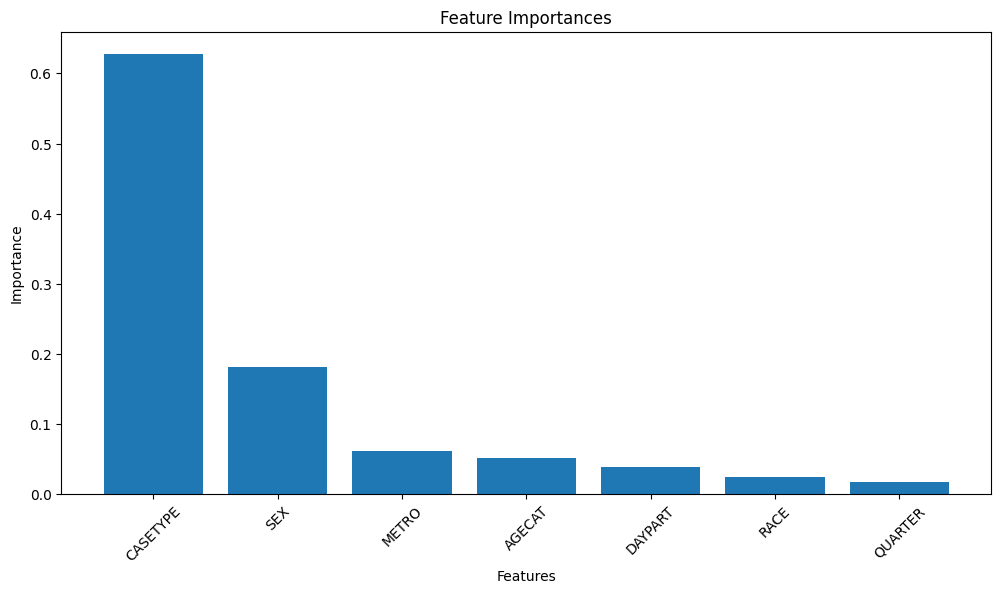

In [38]:
import matplotlib.pyplot as plt

feature_importances = rf_classifier.feature_importances_

features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

features.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
plt.bar(features['Feature'], features['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.title('Feature Importances')
plt.show()

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


X = pd.get_dummies(df_n.drop(['CASEID', 'SEQUENCE'], axis=1))
y = df_n['SEQUENCE']


X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

nb_classifier = GaussianNB()


nb_classifier.fit(X_train, y_train)

y_val_pred = nb_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy}')

y_test_pred = nb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')


Validation Accuracy: 0.7079498423497261
Test Accuracy: 0.7076330016040063


In [91]:
print("Naive Bayes Classifier:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_test_pred))

Naive Bayes Classifier:

Confusion Matrix:
[[ 16018    133     10      0]
 [     0  56742  21239      0]
 [     0 111495 242244      0]
 [     0      0      0   6606]]

Classification Report:
               precision    recall  f1-score   support

      Alcohol       1.00      0.99      1.00     16161
Alcohol_DRUGS       0.34      0.73      0.46     77981
        DRUGS       0.92      0.68      0.78    353739
         None       1.00      1.00      1.00      6606

     accuracy                           0.71    454487
    macro avg       0.81      0.85      0.81    454487
 weighted avg       0.82      0.71      0.74    454487


Accuracy Score:
0.7076330016040063


In [52]:
pip install catboost

In [92]:


import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



X = df_c.drop(['CASEID', 'SEQUENCE'], axis=1) 
y = df_c['SEQUENCE']


X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.5,
    eval_metric='Accuracy',
    use_best_model=True,
    random_seed=42
)


model.fit(
    X_train, y_train,
    cat_features=['METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE'], 
    eval_set=(X_val, y_val),
    verbose=100,
    early_stopping_rounds=50 
)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')

feature_importances = model.get_feature_importance()
print(f'Feature Importances: {feature_importances}')

print("Catboost Classifier:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


0:	learn: 0.7771698	test: 0.7771707	best: 0.7771707 (0)	total: 4.33s	remaining: 7m 9s
99:	learn: 0.8358602	test: 0.8356543	best: 0.8358017 (65)	total: 8m 17s	remaining: 0us

bestTest = 0.8358016841
bestIteration = 65

Shrink model to first 66 iterations.
Test Accuracy: 0.8366619947325226
Feature Importances: [ 3.62027129 12.16717072 38.68629872  2.63069265 39.03913277  3.14061401
  0.71581984]
Catboost Classifier:

Confusion Matrix:
[[ 16018      7    136      0]
 [     0   9217  68764      0]
 [     0   5328 348411      0]
 [     0      0      0   6606]]

Classification Report:
               precision    recall  f1-score   support

      Alcohol       1.00      0.99      1.00     16161
Alcohol_DRUGS       0.63      0.12      0.20     77981
        DRUGS       0.83      0.98      0.90    353739
         None       1.00      1.00      1.00      6606

     accuracy                           0.84    454487
    macro avg       0.87      0.77      0.77    454487
 weighted avg       0.81   

In [93]:

new_data = {
    'METRO': 'MI',
    'AGECAT': 'Old',
    'SEX': 'F',
    'RACE': 'black or african american only',
    'CASETYPE': 'adverse reaction',
    'DAYPART': '1',
    'QUARTER': '1'
}

new_data_df = pd.DataFrame([new_data])


new_data_df = new_data_df[X_train.columns]


predicted_outcome = model.predict(new_data_df)

print(f"The predicted class for the new data is: {predicted_outcome[0]}")


[['DRUGS']]
The predicted class for the new data is: ['DRUGS']


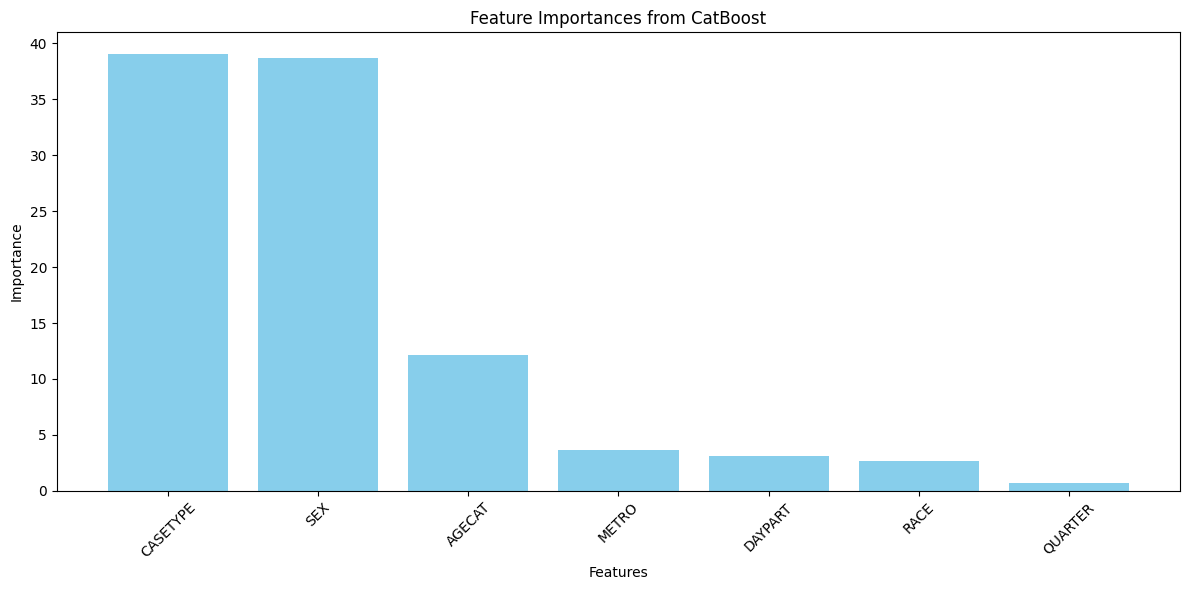

In [94]:
import matplotlib.pyplot as plt
import pandas as pd


feature_importances = model.get_feature_importance()


features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})


features.sort_values(by='Importance', ascending=False, inplace=True)


plt.figure(figsize=(12, 6))
plt.bar(features['Feature'], features['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.title('Feature Importances from CatBoost')
plt.tight_layout()  
plt.show()
